<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/2.4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation

### 2.4.1 MLE for Random Samples

In this subsection, we discuss Maximum Likelihood Estimation (MLE), a method for estimating the parameters of a probability distribution by finding the values that maximize the likelihood of observing the given sample data.

---
**Definition (Likelihood Function):**

Consider a random sample $X_1, X_2, \dots, X_n$ with a joint probability mass function (PMF) or probability density function (PDF):

$$
f(x_1, x_2, \dots, x_n; \theta_1, \dots, \theta_m)
$$

where $\theta_1, \dots, \theta_m$ are the unknown parameters of the distribution. The likelihood function, when viewed as a function of $\theta$, is expressed as:

$$
L(\theta_1, \dots, \theta_m) = f(x_1, x_2, \dots, x_n; \theta_1, \dots, \theta_m)
$$

The Maximum Likelihood Estimates (MLEs), denoted as $\hat{\theta}_1, \dots, \hat{\theta}_m$, are the values of the parameters that maximize this likelihood function:

$$
L(\hat{\theta}_1, \dots, \hat{\theta}_m) = \max_{\theta_1, \dots, \theta_m} L(\theta_1, \dots, \theta_m)
$$

---

**Example (Normal Distribution):**

Suppose $X_1, \dots, X_n$ are drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$. The likelihood function for this sample is:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}
$$

To find the MLEs for $\mu$ and $\sigma^2$, we take the natural logarithm of the likelihood function, yielding:

$$
\ln L(\mu, \sigma^2) = -\frac{n}{2} \ln(2 \pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

By setting the partial derivatives with respect to $\mu$ and $\sigma^2$ equal to zero, we derive the MLEs:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2
$$


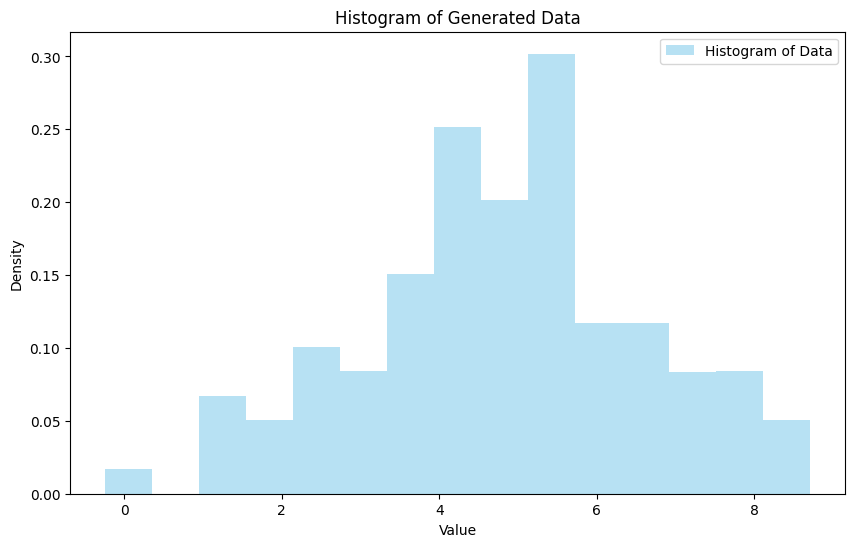

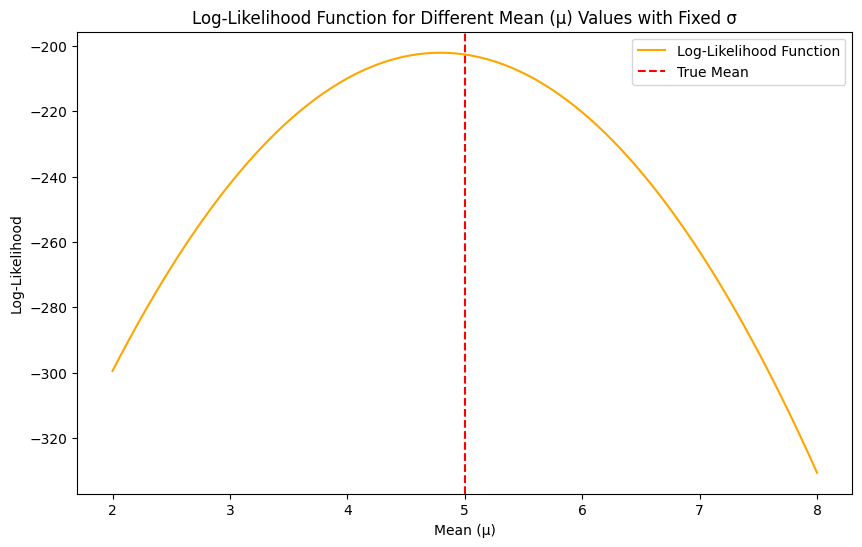

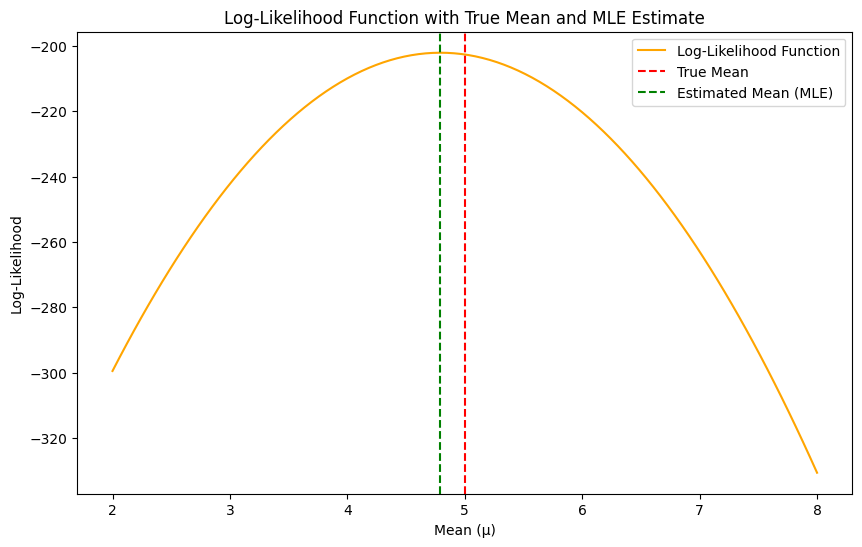

MLE Estimated Mean (μ): 4.792310537110795
MLE Estimated Standard Deviation (σ): 1.8072351580159576


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

np.random.seed(42)
true_mu = 5
true_sigma = 2
data = np.random.normal(loc=true_mu, scale=true_sigma, size=100)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', label="Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Generated Data")
plt.legend()
plt.show()

# Log-likelihood function
def log_likelihood(mu, sigma):
    return np.sum(np.log(norm.pdf(data, mu, sigma)))

# Evaluate log-likelihood for a range of mean values
mu_values = np.linspace(2, 8, 100)
sigma_fixed = true_sigma
likelihoods = [log_likelihood(mu, sigma_fixed) for mu in mu_values]

# Plot log-likelihood function
plt.figure(figsize=(10, 6))
plt.plot(mu_values, likelihoods, label="Log-Likelihood Function", color='orange')
plt.axvline(x=true_mu, color='r', linestyle='--', label="True Mean")
plt.xlabel("Mean (μ)")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Function for Different Mean (μ) Values with Fixed σ")
plt.legend()
plt.show()

# Find MLE using optimization
def neg_log_likelihood(params):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

initial_params = [2, 1]  # initial guesses for mu and sigma
bounds = [(None, None), (1e-5, None)]  # bounds for mu and sigma
result = minimize(neg_log_likelihood, initial_params, bounds=bounds)
mu_mle, sigma_mle = result.x

# Plot with estimated mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(mu_values, likelihoods, label="Log-Likelihood Function", color='orange')
plt.axvline(x=true_mu, color='r', linestyle='--', label="True Mean")
plt.axvline(x=mu_mle, color='green', linestyle='--', label="Estimated Mean (MLE)")
plt.xlabel("Mean (μ)")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Function with True Mean and MLE Estimate")
plt.legend()
plt.show()

print("MLE Estimated Mean (μ):", mu_mle)
print("MLE Estimated Standard Deviation (σ):", sigma_mle)


### 2.4.2 Linear Regression

In this subsection, we discuss linear regression, where the goal is to fit an affine function to a set of data points by finding the coefficients that minimize the difference between observed and predicted values. The method of Maximum Likelihood Estimation (MLE) is applied under the assumption of normally distributed errors.

---
**Objective (Least Squares Criterion):**

Given data points $(x_i, y_i)$ for $i = 1, \dots, n$, we seek to estimate coefficients $\beta_0, \beta_1, \dots, \beta_p$ that minimize the sum of squared residuals:

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where the predicted value $\hat{y}_i$ is given by:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}
$$

---

**Probabilistic Approach (MLE):**

Assuming that the observed values $y_i$ are normally distributed with mean $\hat{y}_i$ and constant variance $\sigma^2$, we can formulate the likelihood function for the parameters $\beta$ as:

$$
L(\beta, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2}}
$$

Taking the natural logarithm of the likelihood function, we get:

$$
\ln L(\beta, \sigma^2) = -\frac{n}{2} \ln(2 \pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

To maximize the likelihood, we minimize the sum of squared residuals, which leads to the least squares solution:

$$
\hat{\beta} = \arg \min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This is equivalent to the familiar least squares criterion used in linear regression.

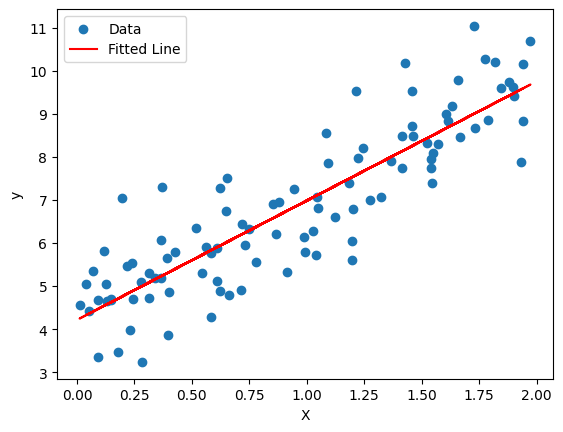

Estimated Slope (m): [2.77011339]
Estimated Intercept (b): 4.215096157546739


In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Parameters for gradient descent
learning_rate = 0.1
n_iterations = 1000
m, b = 0, 0

# Gradient descent to find optimal m and b
for _ in range(n_iterations):
    y_pred = m * X + b
    error = y_pred - y
    m_gradient = 2 * (X.T @ error) / len(X)
    b_gradient = 2 * np.sum(error) / len(X)
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

plt.scatter(X, y, label="Data")
plt.plot(X, m * X + b, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print("Estimated Slope (m):", m[0])
print("Estimated Intercept (b):", b)
